## Task 1: Introduction to Histogram Equalization
### Objective: Understand the basics of histogram equalization and its impact on image contrast.
1.	Load and Display an Image:
    * Load a grayscale image and display it.
    * Plot the histogram of the original image to show the distribution of pixel intensities.
2.	Calculate and Plot Histogram:
   	* Calculate the histogram of the image manually.
	* Plot the histogram to visualize the pixel intensity distribution.
3.	Calculate Cumulative Distribution Function (CDF):
	* Compute the CDF from the histogram.
	* Normalize the CDF to the range [0, 255].
4.	Apply Histogram Equalization:
	* Map the original pixel values to equalized pixel values using the CDF.
	* Display the equalized image and plot its histogram.
5.	Compare Results:
	* Compare the original and equalized images.
	* Discuss the differences in visual quality and histogram distributions.


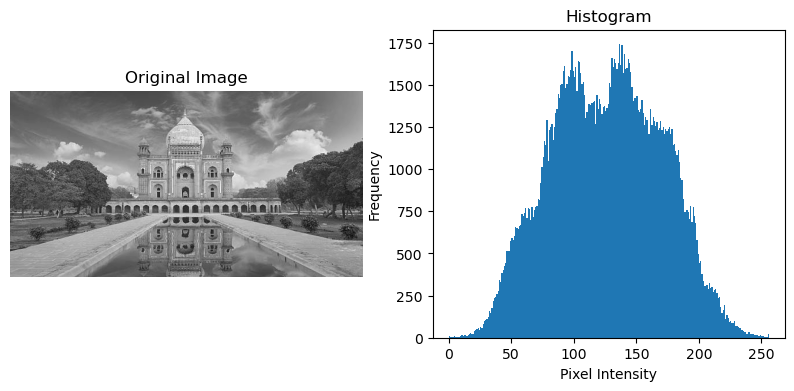

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread(r"C:\Users\DELL\Machine_Vision\lab1.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Plot the histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


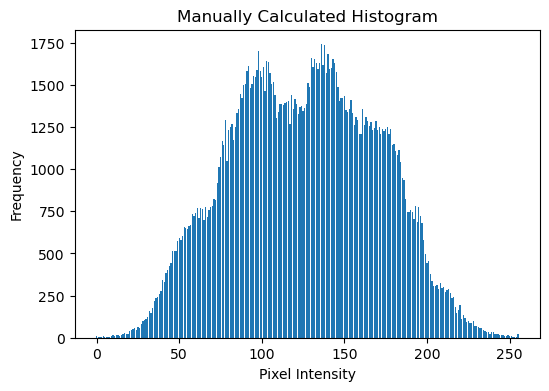

In [3]:
# Calculate the histogram manually
hist = np.zeros(256)
for pixel in image.ravel():
    hist[pixel] += 1

# Plot the manually calculated histogram
plt.figure(figsize=(6, 4))
plt.title('Manually Calculated Histogram')
plt.bar(range(256), hist)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


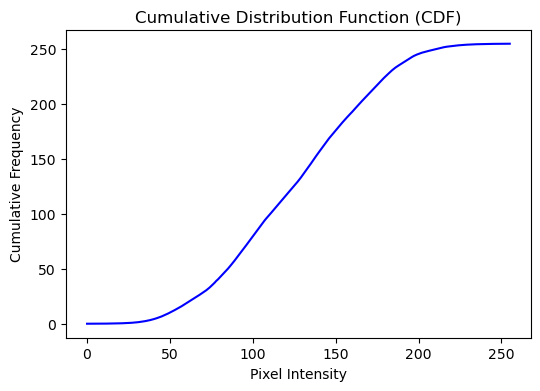

In [4]:
# Compute the CDF
cdf = hist.cumsum()
cdf_normalized = cdf * (255 / cdf[-1])  # Normalize the CDF to the range [0, 255]

# Plot the CDF
plt.figure(figsize=(6, 4))
plt.title('Cumulative Distribution Function (CDF)')
plt.plot(cdf_normalized, color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.show()


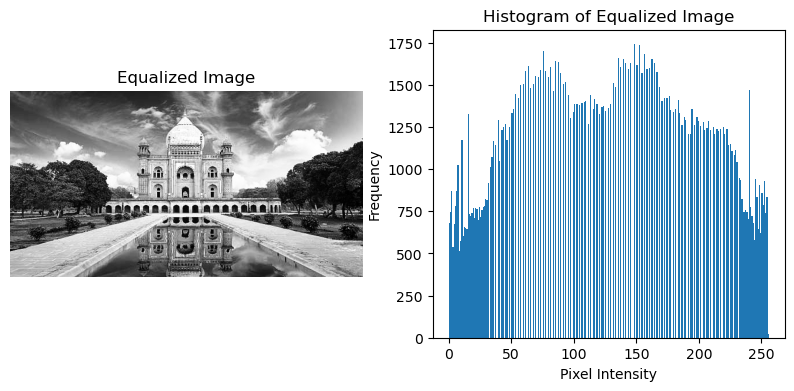

In [5]:
# Map the original pixel values to equalized values using the CDF
equalized_image = np.interp(image.flatten(), range(256), cdf_normalized).reshape(image.shape).astype(np.uint8)

# Display the equalized image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

# Plot the histogram of the equalized image
plt.subplot(1, 2, 2)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


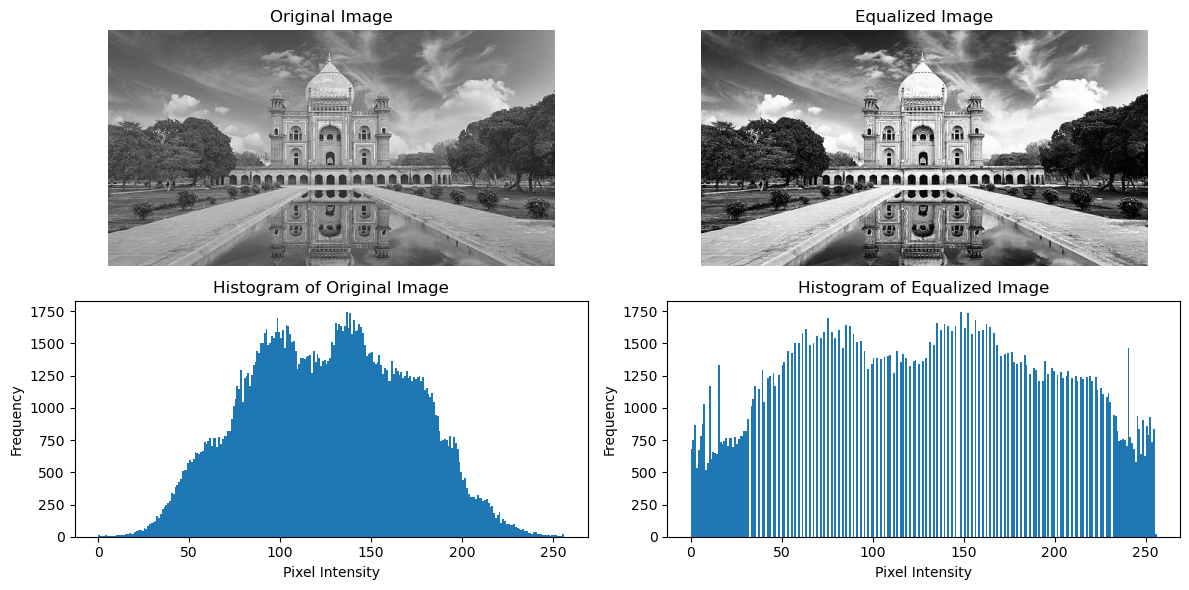

In [6]:
# Display the original and equalized images side by side
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

# Plot the histograms side by side
plt.subplot(2, 2, 3)
plt.title('Histogram of Original Image')
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.title('Histogram of Equalized Image')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Task 2: Comparing Histogram Equalization Techniques
### Objective: Compare standard histogram equalization with adaptive histogram equalization.
1.	Implement Adaptive Histogram Equalization (AHE):
	* Divide the image into smaller regions (tiles).
	* Apply histogram equalization to each tile separately.
 	* Combine the tiles to form the final image.
2.	Implement Contrast Limited Adaptive Histogram Equalization (CLAHE):
	* Enhance the AHE implementation by limiting the contrast.
	* Apply CLAHE to the image and display the result.
3.	Compare Results:
	* Display the original image, standard histogram equalized image, AHE image, and CLAHE image side by side.
	* Discuss the differences in visual quality and histogram distributions.


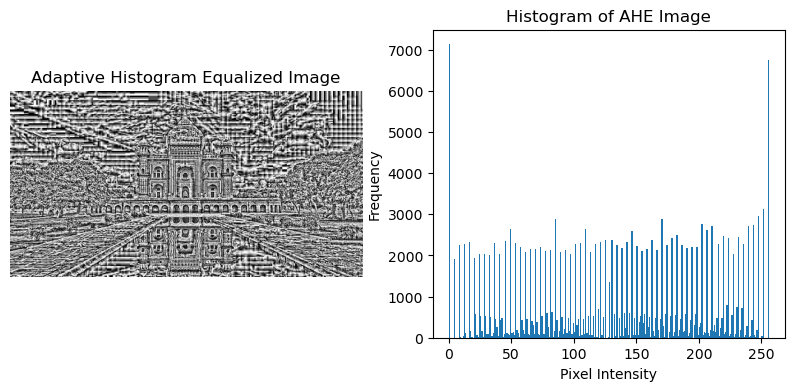

In [8]:
def apply_ahe(image, tile_size):
    h, w = image.shape
    ahe_image = np.zeros((h, w), dtype=np.uint8)
    
    # Divide the image into tiles
    for i in range(0, h, tile_size):
        for j in range(0, w, tile_size):
            tile = image[i:i+tile_size, j:j+tile_size]
            equalized_tile = cv2.equalizeHist(tile)
            ahe_image[i:i+tile_size, j:j+tile_size] = equalized_tile
    
    return ahe_image

# Define the tile size
tile_size = 8

# Apply AHE to the image
ahe_image = apply_ahe(image, tile_size)

# Display the AHE image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Adaptive Histogram Equalized Image')
plt.imshow(ahe_image, cmap='gray')
plt.axis('off')

# Plot the histogram of the AHE image
plt.subplot(1, 2, 2)
plt.title('Histogram of AHE Image')
plt.hist(ahe_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


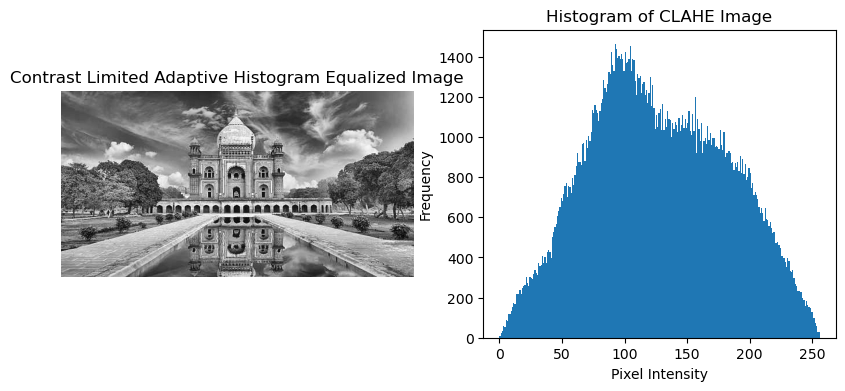

In [9]:
# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
clahe_image = clahe.apply(image)

# Display the CLAHE image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Contrast Limited Adaptive Histogram Equalized Image')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

# Plot the histogram of the CLAHE image
plt.subplot(1, 2, 2)
plt.title('Histogram of CLAHE Image')
plt.hist(clahe_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


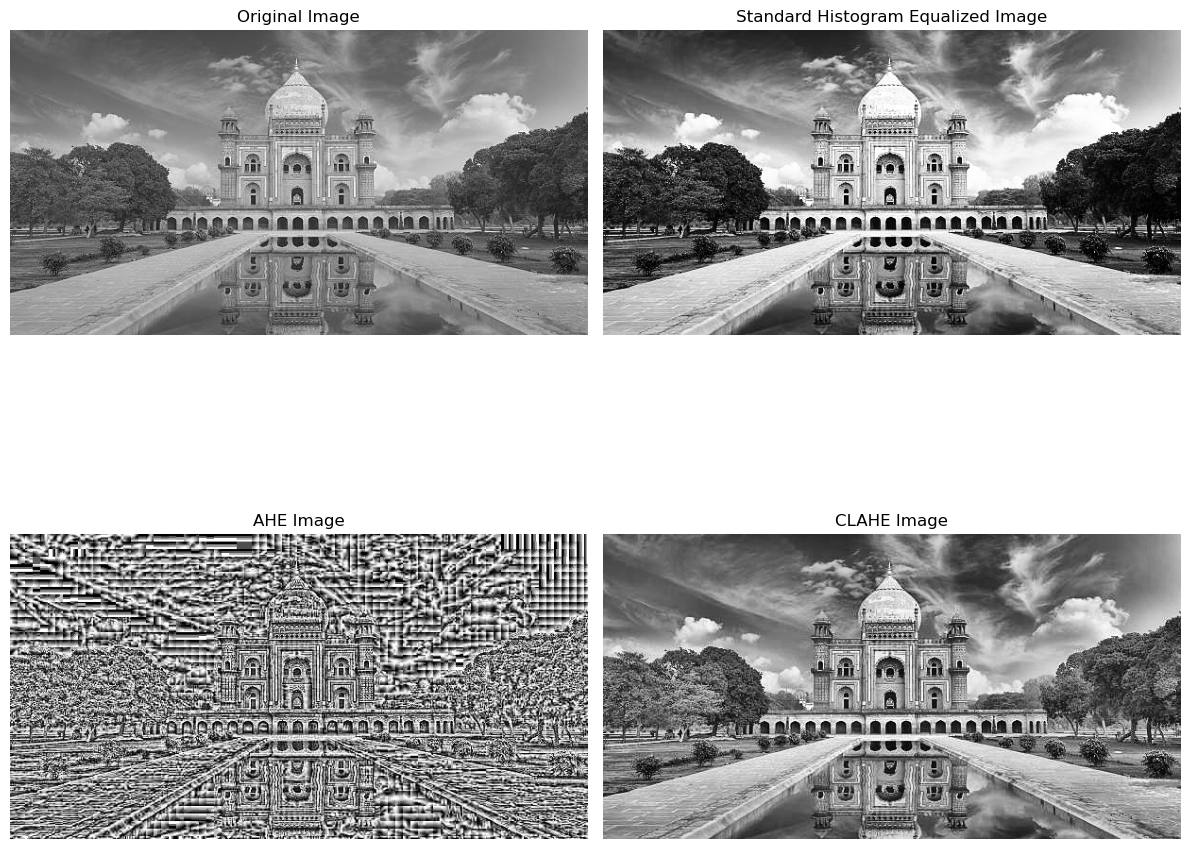

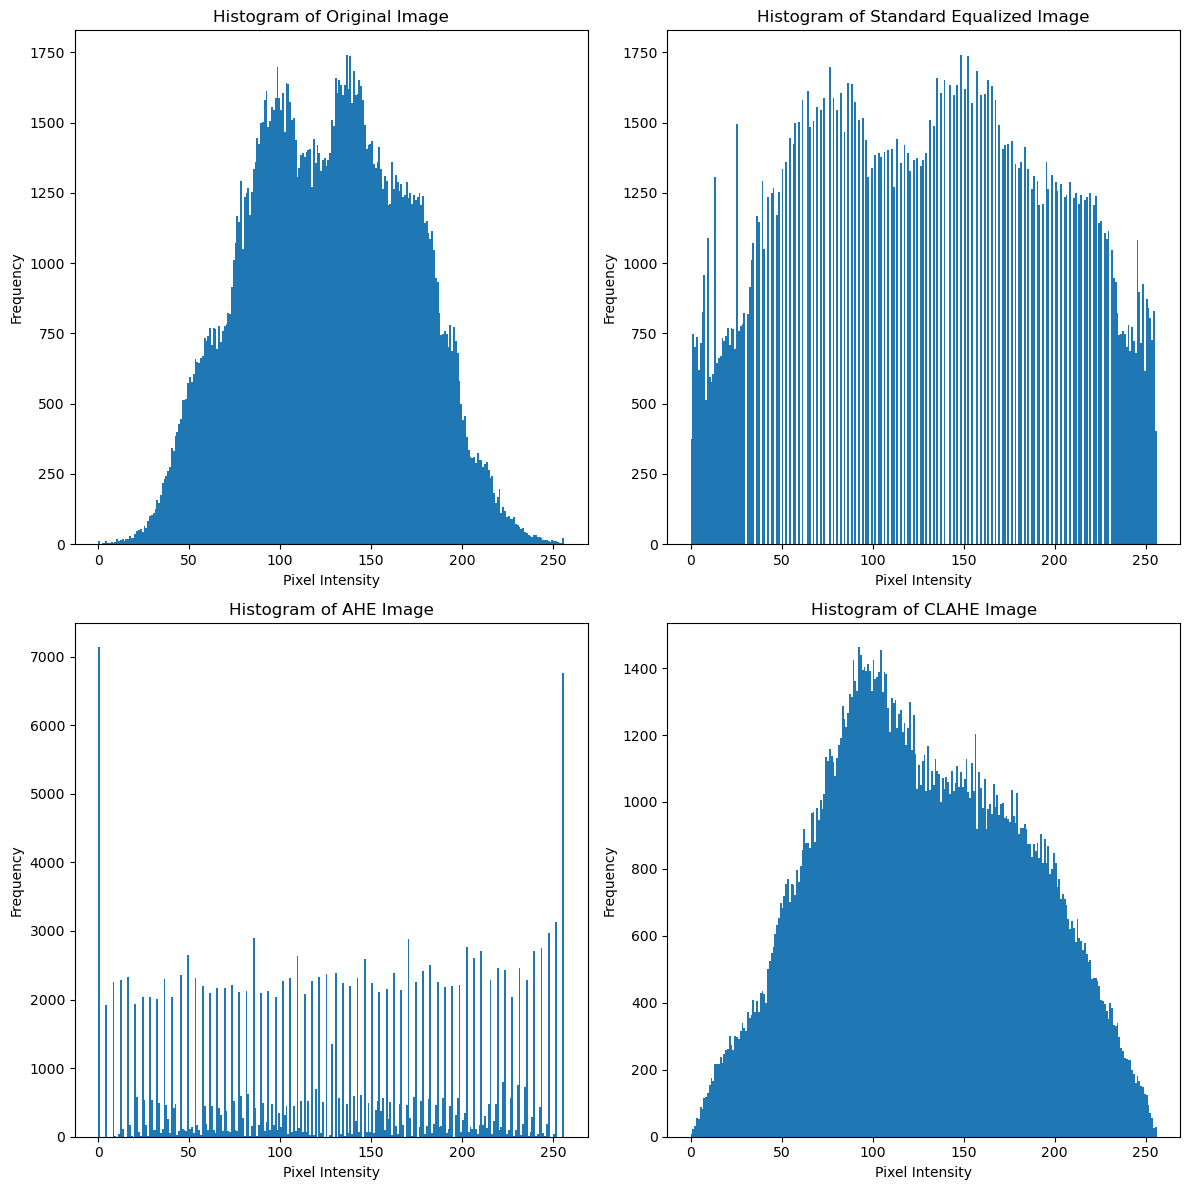

In [10]:
# Standard histogram equalization for comparison
standard_equalized_image = cv2.equalizeHist(image)

# Display all images side by side
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Standard Histogram Equalized Image')
plt.imshow(standard_equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('AHE Image')
plt.imshow(ahe_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('CLAHE Image')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot histograms for comparison
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Histogram of Original Image')
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.title('Histogram of Standard Equalized Image')
plt.hist(standard_equalized_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.title('Histogram of AHE Image')
plt.hist(ahe_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.title('Histogram of CLAHE Image')
plt.hist(clahe_image.ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Result Comparison
* **Original Image:** The histogram might be concentrated in a narrow range, indicating low contrast.
* **Standard Histogram Equalized Image:** The histogram is spread out more evenly, improving contrast but might introduce artifacts in regions with homogeneous intensities.
* **AHE Image:** Improves local contrast in small regions, but might enhance noise and over-amplify some areas.
* **CLAHE Image:** Limits contrast amplification to avoid noise enhancement, providing a balanced improvement in contrast and detail without significant noise amplification.
  
This comparison shows how different techniques affect image quality and histogram distributions. 

## Task 3: Implementing Histogram Equalization on Color Images
### Objective: Apply histogram equalization to color images.
1.	Separate Color Channels:
	* Split the color image into its Red, Green, and Blue (RGB) channels.
2.	Apply Histogram Equalization to Each Channel:
	* Perform histogram equalization on each color channel separately.
3.	Reconstruct the Color Image:
	* Combine the equalized color channels to form the final image.
4.	Compare Results:
	* Display the original and equalized color images.
	* Discuss the visual differences and effects of equalization on color images.


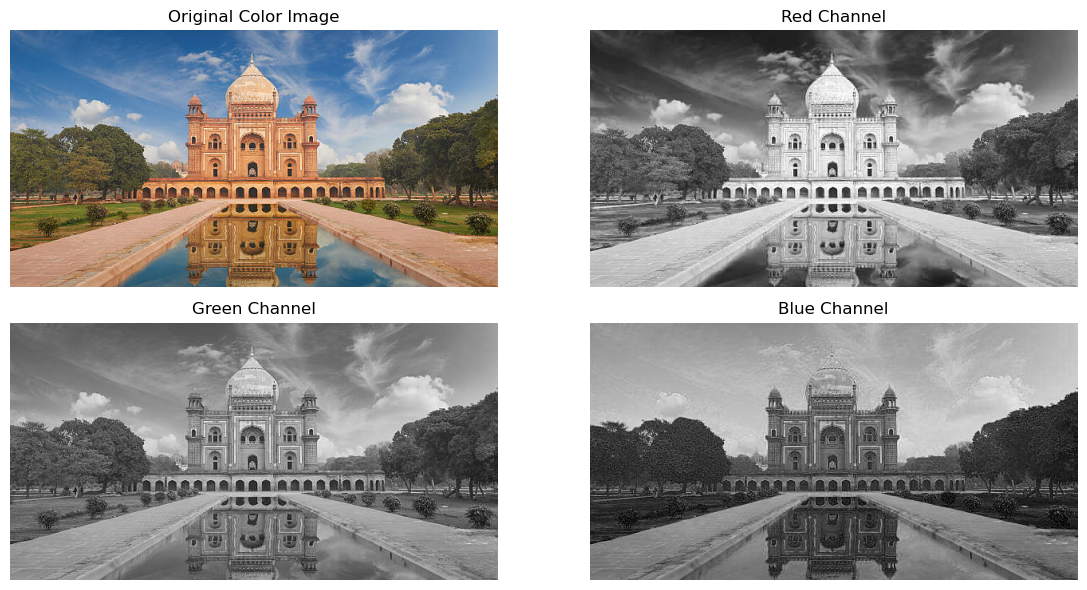

In [13]:
# Load the color image
color_image = cv2.imread(r"C:\Users\DELL\Machine_Vision\lab1.jpg")

# Convert the image from BGR to RGB
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Separate the color channels
r_channel, g_channel, b_channel = cv2.split(color_image_rgb)

# Display the original color image and its channels
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Original Color Image')
plt.imshow(color_image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(r_channel, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(g_channel, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(b_channel, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


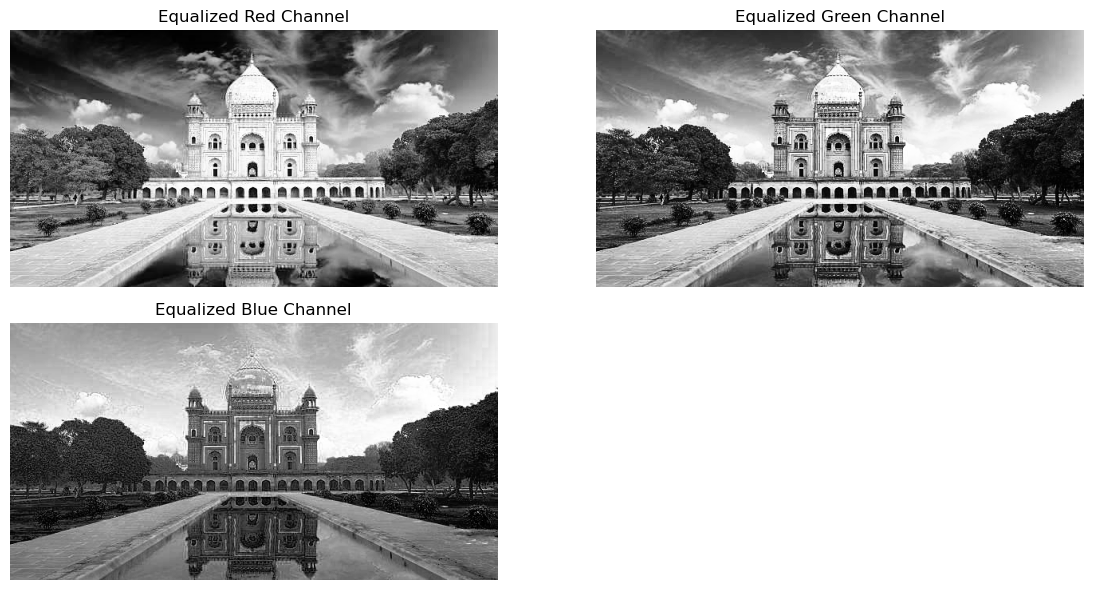

In [14]:
# Apply histogram equalization to each channel
equalized_r = cv2.equalizeHist(r_channel)
equalized_g = cv2.equalizeHist(g_channel)
equalized_b = cv2.equalizeHist(b_channel)

# Display the equalized channels
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Equalized Red Channel')
plt.imshow(equalized_r, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Equalized Green Channel')
plt.imshow(equalized_g, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Equalized Blue Channel')
plt.imshow(equalized_b, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


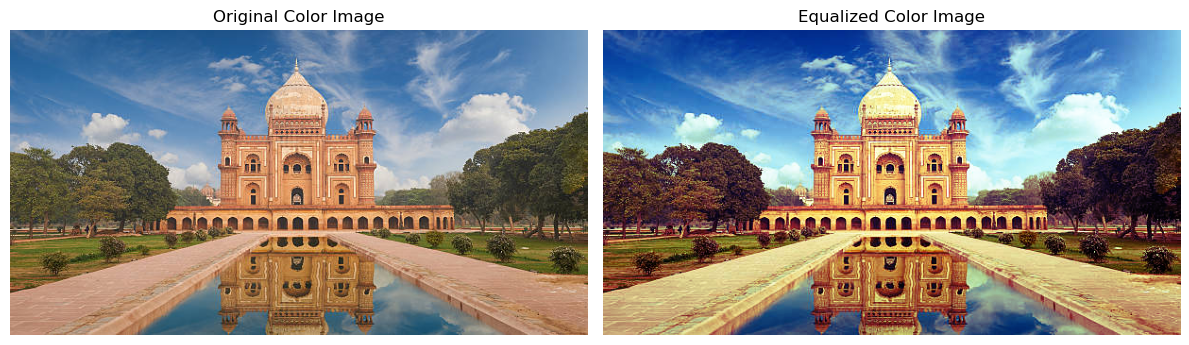

In [15]:
# Merge the equalized channels back into a color image
equalized_color_image = cv2.merge((equalized_r, equalized_g, equalized_b))

# Convert the image back to BGR for OpenCV compatibility
equalized_color_image_bgr = cv2.cvtColor(equalized_color_image, cv2.COLOR_RGB2BGR)

# Display the original and equalized color images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.imshow(color_image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Color Image')
plt.imshow(equalized_color_image)
plt.axis('off')

plt.tight_layout()
plt.show()


## Result Comparison
* **Original Color Image:** The image might have regions with low contrast or poor visibility of details.
* **Equalized Color Image:** Each channel's contrast is enhanced, which can improve overall image contrast and make details more visible.

## Task 4: Histogram Equalization in Different Applications
### Objective: Explore the use of histogram equalization in various applications.
1.	Medical Imaging:
	* Apply histogram equalization to medical images (e.g., X-rays, MRIs).
	* Discuss how equalization can enhance the visibility of important features.
2.	Satellite Imagery:
	* Apply histogram equalization to satellite images.
	* Analyze how equalization improves the contrast and details in the images.
3.	Document Scanning:
	* Apply histogram equalization to scanned documents.
	* Evaluate how equalization enhances text readability and clarity.
4.	Night Vision:
	* Apply histogram equalization to night vision images.
	* Discuss how equalization improves the visibility of objects in low-light conditions.


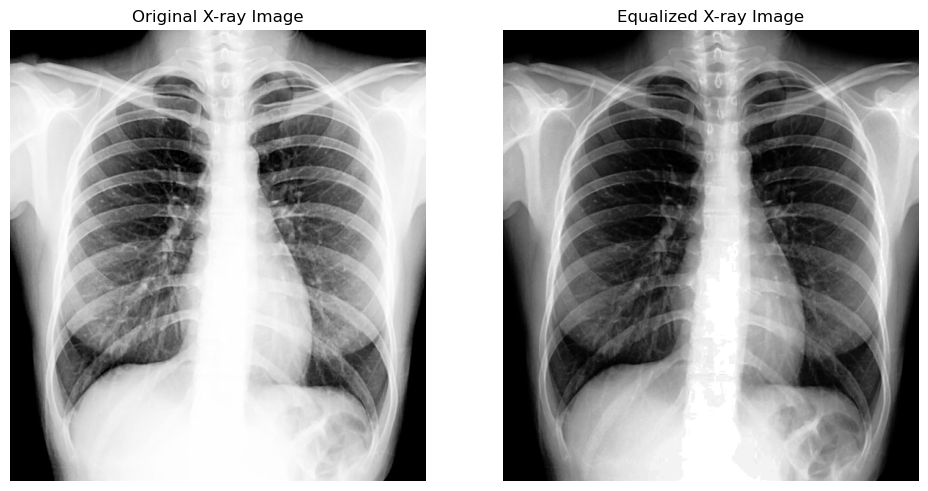

In [18]:
# Load the X-ray image
xray_image = cv2.imread(r"C:\Users\DELL\Machine_Vision\x_ray_img_lab1.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_xray_image = cv2.equalizeHist(xray_image)

# Display the original and equalized X-ray images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original X-ray Image')
plt.imshow(xray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized X-ray Image')
plt.imshow(equalized_xray_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


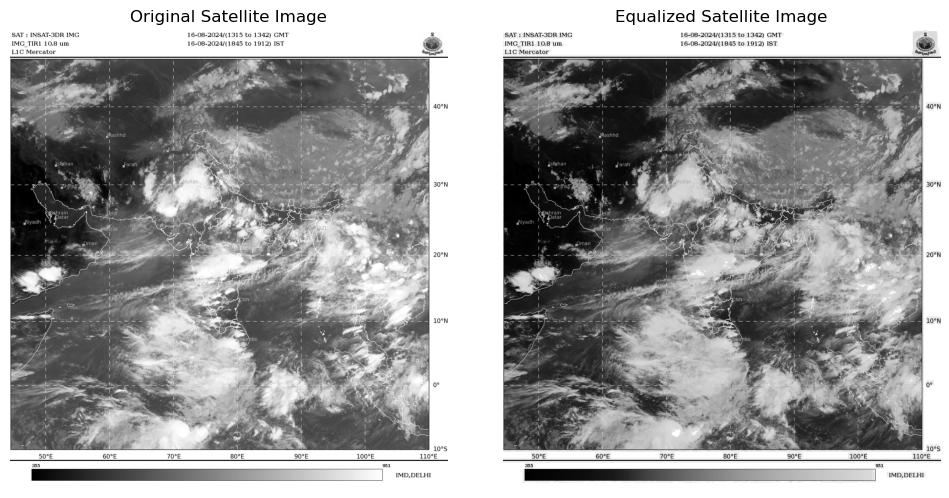

In [22]:
# Load the satellite image
satellite_image = cv2.imread(r"C:\Users\DELL\Machine_Vision\Satellite_img.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_satellite_image = cv2.equalizeHist(satellite_image)

# Display the original and equalized satellite images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Satellite Image')
plt.imshow(satellite_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Satellite Image')
plt.imshow(equalized_satellite_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


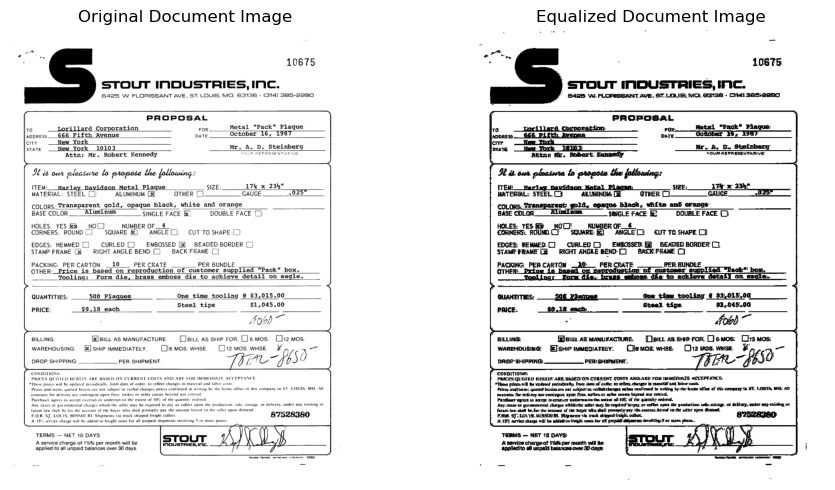

In [24]:
# Load the scanned document image
document_image = cv2.imread(r"C:\Users\DELL\Machine_Vision\scanned_img.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_document_image = cv2.equalizeHist(document_image)

# Display the original and equalized document images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Document Image')
plt.imshow(document_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Document Image')
plt.imshow(equalized_document_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


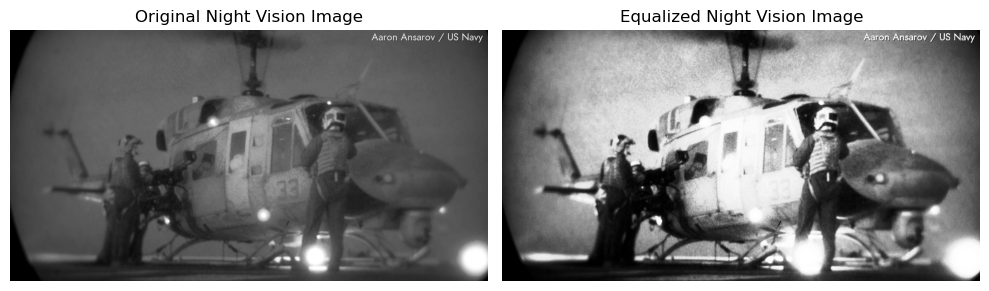

In [26]:
# Load the night vision image
night_vision_image = cv2.imread(r"C:\Users\DELL\Machine_Vision\night_vis_img.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_night_vision_image = cv2.equalizeHist(night_vision_image)

# Display the original and equalized night vision images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Night Vision Image')
plt.imshow(night_vision_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Night Vision Image')
plt.imshow(equalized_night_vision_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Task 5: Histogram Equalization for Low Contrast Images
### Objective: Improve the visibility of features in images with low contrast.
1.	Select a Low Contrast Image:
	* Choose an image with low contrast or uniform intensity distribution.
2.	Apply Histogram Equalization:
	* Perform histogram equalization on the low contrast image.
	* Display and compare the results to the original image.
3.	Analyze Results:
	* Evaluate the improvement in contrast and feature visibility.
	* Discuss how histogram equalization addresses low contrast issues.


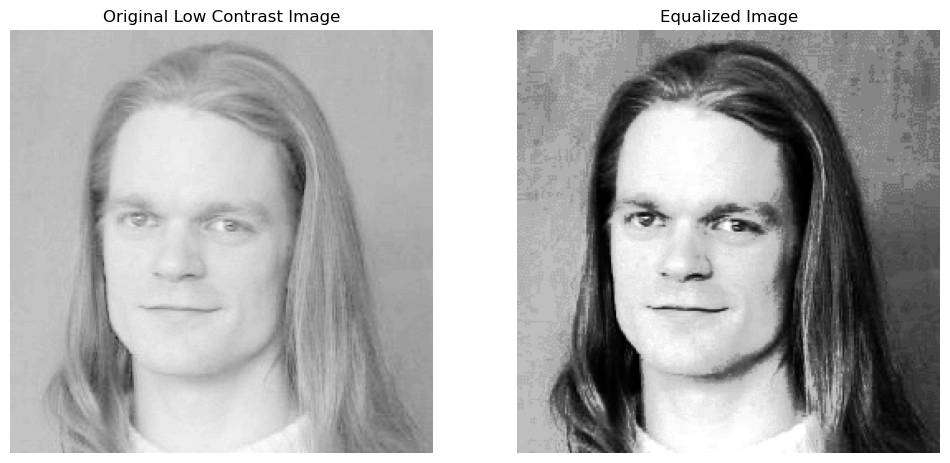

In [30]:
# Load a low contrast image
image = cv2.imread(r"C:\Users\DELL\Machine_Vision\low_const_img.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Low Contrast Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()


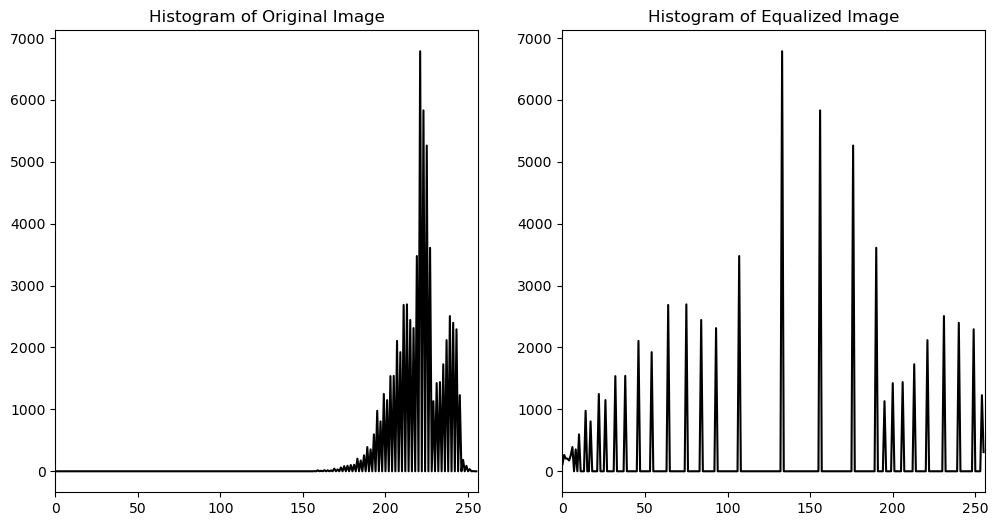

In [32]:
equalized_image = cv2.equalizeHist(image)

# Compute histograms
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Histogram of Original Image')
plt.plot(original_hist, color='black')
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.title('Histogram of Equalized Image')
plt.plot(equalized_hist, color='black')
plt.xlim([0, 256])

plt.show()


## Analyzing Results
#### To analyze the improvement in contrast and feature visibility:

* Visual Comparison: Look at the visual difference between the original low contrast image and the equalized image. The equalized image should have more distinct features and enhanced contrast.

* Histogram Comparison: Plot and compare the histograms of the original and equalized images. This can help you see how histogram equalization redistributes the pixel intensities to cover a wider range.

* **Improvement in Contrast:** Histogram equalization spreads out the pixel values across the full range, enhancing the contrast. This is particularly useful for images with low contrast where features might be hard to distinguish.

* **Feature Visibility:** By redistributing the intensity values, histogram equalization can reveal details that were previously not visible due to the lack of contrast.

* **Addressing Low Contrast Issues:** Histogram equalization effectively addresses low contrast issues by mapping the original intensity values to a new range where they are more spread out. This helps in improving the visibility of features and details that were not prominent in the original image.

## Task 6: Multi-Scale Histogram Equalization
### Objective: Explore the effects of applying histogram equalization at different scales.
1.	Image Rescaling:
	* Resize the image to different scales (e.g., 50%, 100%, 200%).
2.	Apply Histogram Equalization:
	* Perform histogram equalization on the resized images.
3.	Compare Results:
	* Compare the equalized images at different scales.
	* Discuss how the scale affects the equalization results and image details.


In [39]:
image = cv2.imread(r"C:\Users\DELL\Machine_Vision\lab1.jpg", cv2.IMREAD_GRAYSCALE)

# Resize the image to different scales
scales = [0.5, 1.0, 2.0]
resized_images = [cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR) for scale in scales]


In [41]:
# Apply histogram equalization to the resized images
equalized_images = [cv2.equalizeHist(img) for img in resized_images]

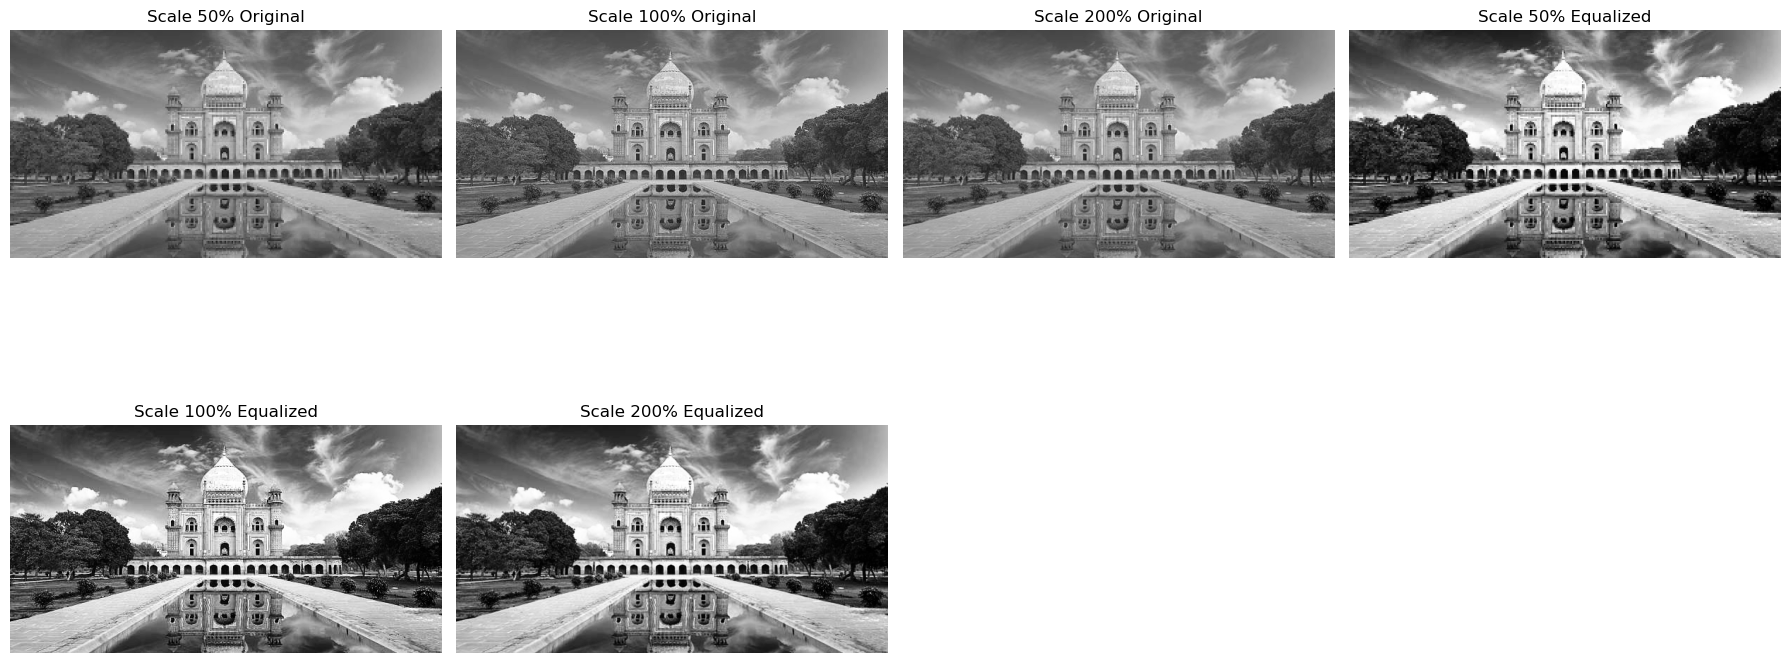

In [43]:
# Plot the original and equalized images at different scales
plt.figure(figsize=(18, 12))

for i, (original, equalized) in enumerate(zip(resized_images, equalized_images), 1):
    plt.subplot(3, 4, i)
    plt.title(f'Scale {int(scales[i-1]*100)}% Original')
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 4, i + 3)
    plt.title(f'Scale {int(scales[i-1]*100)}% Equalized')
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


* **Scale Effects:** As the scale of the image changes, the details and features may vary. Smaller scales (e.g., 50%) might lose fine details, while larger scales (e.g., 200%) might introduce blurring or artifacts. Histogram equalization will adjust the contrast according to the scale, which may lead to different visibility of features.

* **Histogram Redistribution:** When resizing, the pixel distribution changes, and thus the histogram equalization might result in different enhancements. For smaller images, details might become more pronounced, while for larger images, equalization could either emphasize or mask certain features depending on the amount of resizing artifacts.

* **Image Quality:** Resizing an image affects its quality and detail, which in turn impacts the effectiveness of histogram equalization. High scaling might lead to loss of clarity, whereas small scaling might preserve details but not enhance contrast as effectively.

## Task 7: Histogram Equalization for Image Enhancement
### Objective: Use histogram equalization to enhance images for better visual analysis.
1.	Select Images:
	* Choose images with varying levels of detail and contrast.
2.	Apply Histogram Equalization:
	* Perform histogram equalization on the selected images.
3.	Evaluate Enhancement:
	* Compare the equalized images to the originals in terms of detail enhancement and clarity.
	* Discuss how histogram equalization improves visual analysis in different scenarios.


In [62]:
# Define paths to your images
image_paths = [
    r"C:\Users\DELL\Machine_Vision\sample`1.jpg",
r"C:\Users\DELL\Machine_Vision\sample3.jpg",
r"C:\Users\DELL\Machine_Vision\sample2.jpeg"
]

# Load the images
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

# Apply histogram equalization
equalized_images = [cv2.equalizeHist(img) for img in images]


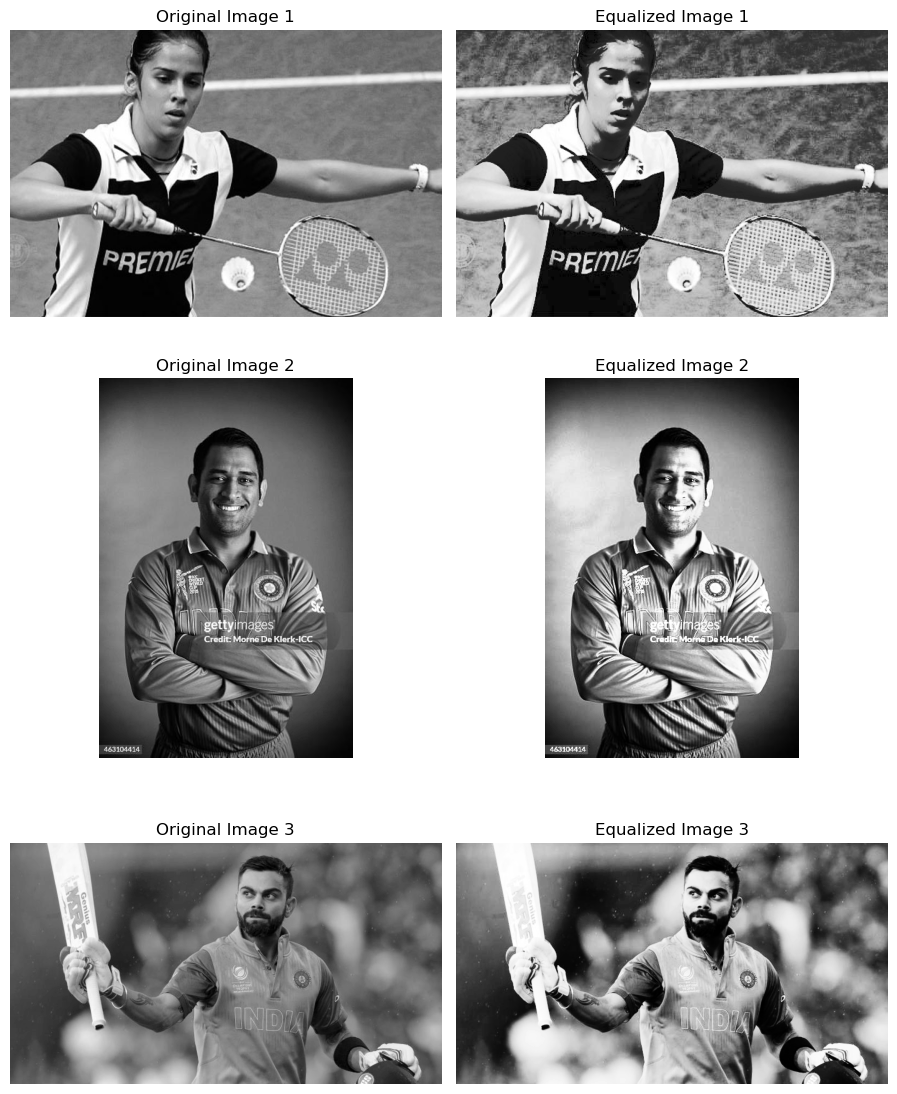

In [64]:
# Plot the original and equalized images
plt.figure(figsize=(18, 12))

for i, (original, equalized) in enumerate(zip(images, equalized_images), 1):
    plt.subplot(len(images), 4, 4*i-3)
    plt.title(f'Original Image {i}')
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    
    plt.subplot(len(images), 4, 4*i-2)
    plt.title(f'Equalized Image {i}')
    plt.imshow(equalized, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


* Detail Enhancement: Histogram equalization enhances contrast by redistributing pixel intensities. This can make details in the image more visible, especially in areas with poor contrast. Evaluate how the equalized images show improved details compared to the originals.

* Clarity Improvement: For images with varying levels of contrast, histogram equalization can make objects and features more distinct. Discuss how equalization improves clarity and visibility in different scenarios, such as low-light images or images with subtle details.

* Visual Analysis: Enhanced images often allow for better visual analysis, especially in fields like medical imaging, satellite imagery, or document scanning. Histogram equalization can aid in revealing important features that were previously hard to distinguish due to poor contrast.

### Scenarios:

* Technical Images: For technical or scientific images, better contrast can highlight measurement details or subtle variations.
* Portraits: In portraits, equalization can enhance facial features and textures.
* Landscapes: For landscapes, equalization can improve visibility of terrain details and enhance overall image appeal.

## Task 8: Histogram Equalization in Image Segmentation
### Objective: Assess the impact of histogram equalization on image segmentation performance.
1.	Image Segmentation:
	* Perform segmentation on an image using thresholding or region-based methods.
2.	Apply Histogram Equalization:
	* Apply histogram equalization to the original image and perform the same segmentation.
3.	Compare Segmentation Results:
	* Analyze the differences in segmentation results before and after histogram equalization.
	* Discuss the impact of equalization on segmentation accuracy and effectiveness.


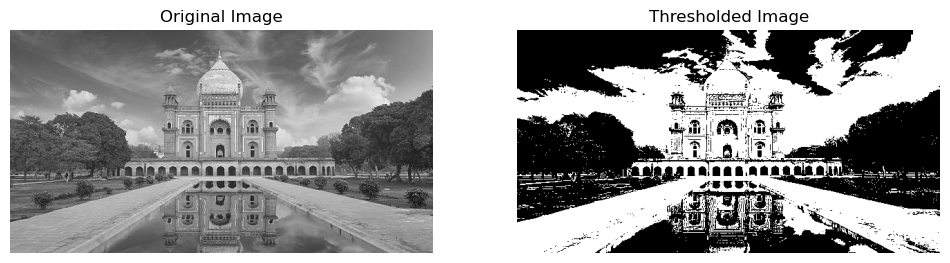

In [71]:
image = cv2.imread(r"C:\Users\DELL\Machine_Vision\lab1.jpg", cv2.IMREAD_GRAYSCALE)

# Perform segmentation using thresholding
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.show()


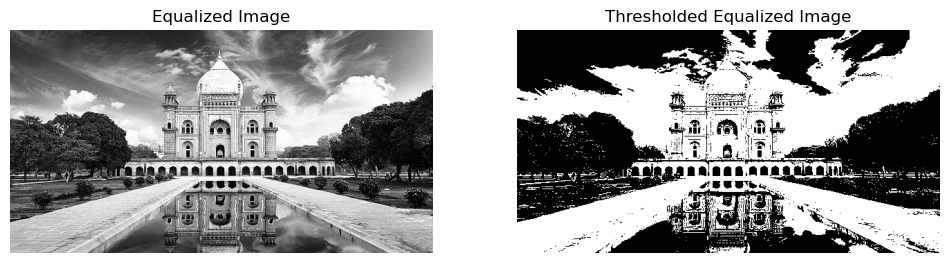

In [73]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Perform segmentation on the equalized image
_, thresholded_equalized_image = cv2.threshold(equalized_image, 128, 255, cv2.THRESH_BINARY)

# Display the equalized and thresholded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Equalized Image')
plt.imshow(thresholded_equalized_image, cmap='gray')
plt.axis('off')

plt.show()


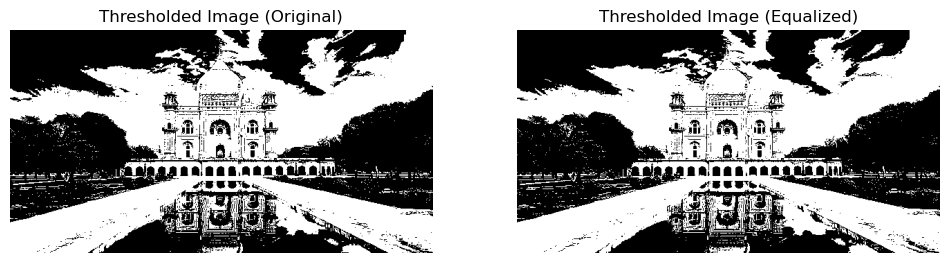

In [75]:
# Plot the comparison of thresholded images before and after equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Thresholded Image (Original)')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image (Equalized)')
plt.imshow(thresholded_equalized_image, cmap='gray')
plt.axis('off')

plt.show()


1. **Impact on Segmentation Accuracy:**

* Histogram equalization can improve the segmentation accuracy by enhancing the contrast between foreground and background, making it easier to distinguish between different regions.
* In some cases, equalization might introduce noise or artifacts, which could lead to over-segmentation or the identification of false boundaries.

2. **Effectiveness:**

* Thresholding: For simple thresholding, histogram equalization often leads to clearer segmentation, especially in images where the original contrast is low.
* Region-based Segmentation: If you were to use region-based methods like watershed or k-means, equalization might help in more accurate region detection by enhancing the contrast between different regions.

3. **Analysis of Results:**

* Original vs. Equalized: Compare the segmentation results by observing how well the objects or regions of interest are captured in the equalized image compared to the original. In most cases, equalization will provide more distinct boundaries, which leads to better segmentation.

4. **Scenario-specific Considerations:**

* For medical images, where precise segmentation is crucial, histogram equalization can enhance the visibility of boundaries, leading to more accurate segmentation.
* In satellite images, where contrast is often low, equalization can help in distinguishing terrain features, improving the segmentation results.